<a href="https://colab.research.google.com/github/Zubayrahmad/Capston-Project-1/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as


In [ ]:
import pandas as pd
import numpy as np

Mount our 'Google Drive'  and read the CSV file of 'Play Store Data Analysis'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Google Play Store/Play Store Data.csv'

In [ ]:
PSDA = pd.read_csv(file_path)

In [ ]:
PSDA.shape

(10841, 13)

In [ ]:
PSDA.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
PSDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
PSDA.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
##  We can use the "ISNULL()" function to know how many Missing value or Nan value present in the Dataset. ->
PSDA.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
## Reusable Data ->
def printinfo():
    temp = pd.DataFrame(index=PSDA.columns)
    temp['data_type'] = PSDA.dtypes
    temp['null_count'] = PSDA.isnull().sum()
    temp['unique_count'] = PSDA.nunique()
    return temp

In [ ]:
## Let’s call the function and see what it returns -> 
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [ ]:
 ## Now we can start the process of Data Cleaning, let's start with the Column. ->
 PSDA[PSDA.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
## By using Data Cleaning we find that their is only one Missing value in the column, So let's fill the Missing value. In place of Missing value we use 'Free'. ->
PSDA['Type'].fillna("Free", inplace = True)
PSDA.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
## Now, we can move ahead on to the column ->
PSDA[PSDA['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
## By using this meathod we cant understand how many columns are missing to understand carefully we have to use we have iloc and loc function. ->
PSDA.loc[10465:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [ ]:
## We can clearly see that row 10472 has missing data for the Category column and all the prevailing column values are being replaced with its previous column. A better idea will be to drop this row from our data frame. ->
PSDA.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
## After fixing all values now we can chech by using "Pintinfo()". ->
modeValueRating = PSDA['Rating'].mode()
PSDA['Rating'].fillna(value=modeValueRating[0], inplace = True)
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
## Their are some content in Columns like Reviews, Size, Installs, & price should have an 'int' or 'float' datatype, But here we can see of object type, So we have to convert them to their respective correct type.
PSDA['Reviews'] = PSDA.Reviews.astype(int)
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
## In size column here some special characters.We need to remove all of these character and then convert it to int or float. ->
## Removing the '+' symbol. ->
PSDA['Size'] = PSDA.Size.apply(lambda x: x.strip('+'))

## Removing the ',' symbol. ->
PSDA['Size'] = PSDA.Size.apply(lambda x: x.replace(',', ''))

## Replacing the 'M' symbol by multiplying the value with 1000000. ->
PSDA['Size'] = PSDA.Size.apply(lambda x: x.replace('M', 'e+6'))

## Replacing the k by multiplying the value with 1000. ->
PSDA['Size'] = PSDA.Size.apply(lambda x: x.replace('k', 'e+3'))

## Replacing the Varies with device value with Nan. ->
PSDA['Size'] = PSDA.Size.replace('Varies with device', np.NaN)

## Now, finally converting all these values to numeric type. ->
PSDA['Size'] = pd.to_numeric(PSDA['Size'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
##  To convert this column from 'Object' to 'Int'. ->
PSDA.dropna(subset = ['Size'], inplace=True)
PSDA['Installs'] = PSDA.Installs.apply(lambda x: x.strip('+'))

In [ ]:
## Removing the ',' Symbol. ->
PSDA['Installs'] = PSDA.Installs.apply(lambda x: x.replace(',', ''))

## To convert this from 'Str' to 'Numeric'. ->
PSDA['Installs'] = pd.to_numeric(PSDA['Installs'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
# ANALYSIS AND EXAMINE THE PLAYSTORE ->
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
## TOP CATEGORIES APPS IN THE PLAY STORE , WHICH CONTAINS THE HIGHEST NUMBER OF APPS ->
y = PSDA['Category'].value_counts().index
x = PSDA['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):  
    xsis.append(x[i])
    ysis.append(y[i])

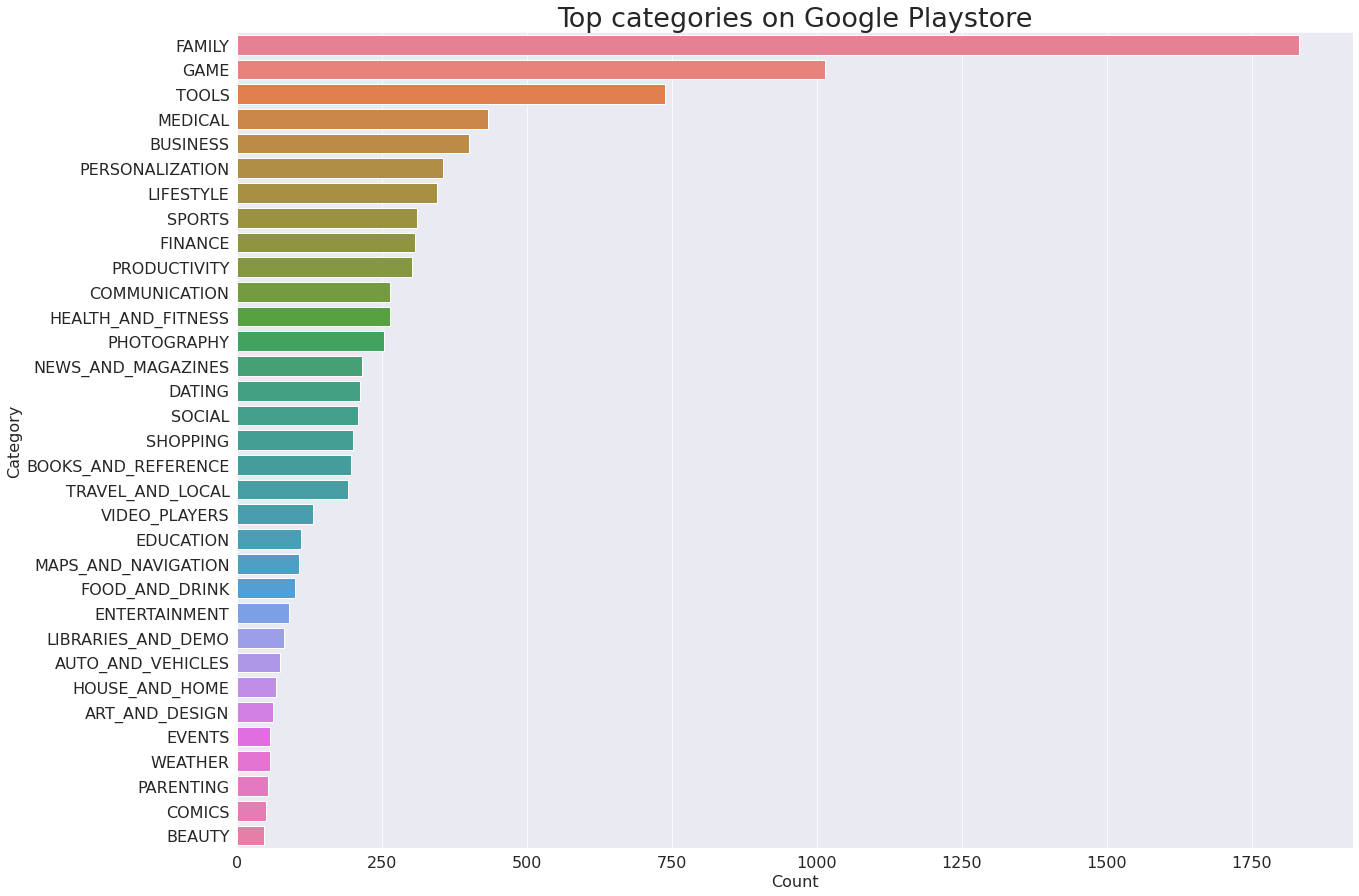

In [ ]:
## DEFINING 'X' AND 'Y' AXIS AND SEE ->
plt.figure(figsize=(20,15))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 27);

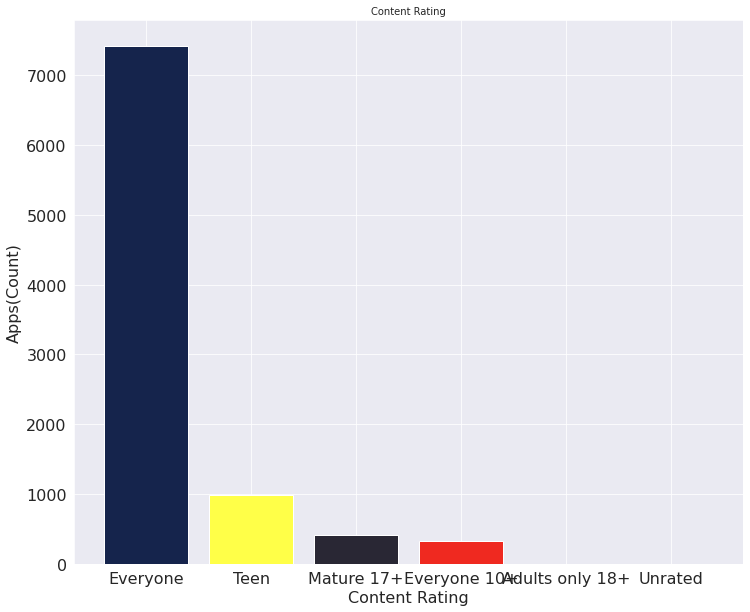

In [ ]:
## LIST OF CATEGORY OF APPS FROM THE "CONTENT RATING" COLUMN IS FOUND MORE ON THE PLAY STORE ->
x2 = PSDA['Content Rating'].value_counts().index
y2 = PSDA['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=1);
plt.title('Content Rating',size = 10);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

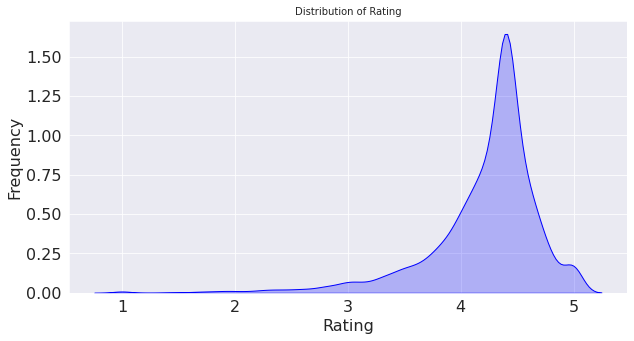

In [ ]:
## LOOK AT THE DISTRIBUTION OF RATINGS OF THE DATA FRAME ->
plt.figure(figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(PSDA.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 10);

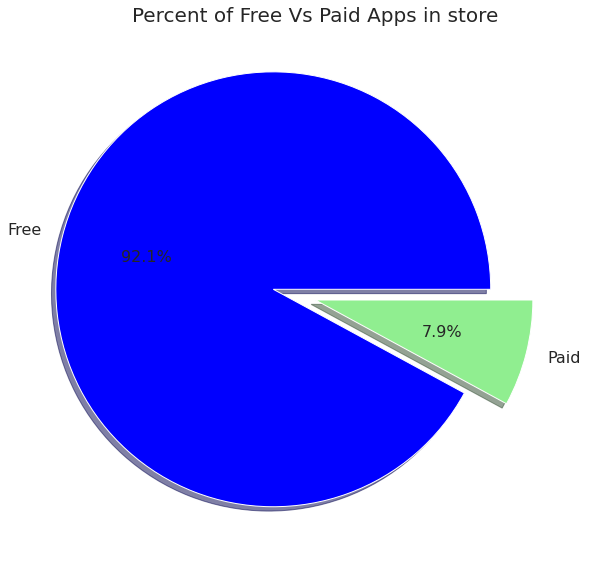

In [ ]:
## LISTS OF "PAID" APPS AND "FREE" APPS ->
plt.figure(figsize=(10,10))
labels = PSDA['Type'].value_counts(sort = True).index
sizes = PSDA['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [ ]:
# Which category App’s have the most number of installs
highest_Installs_df = PSDA.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

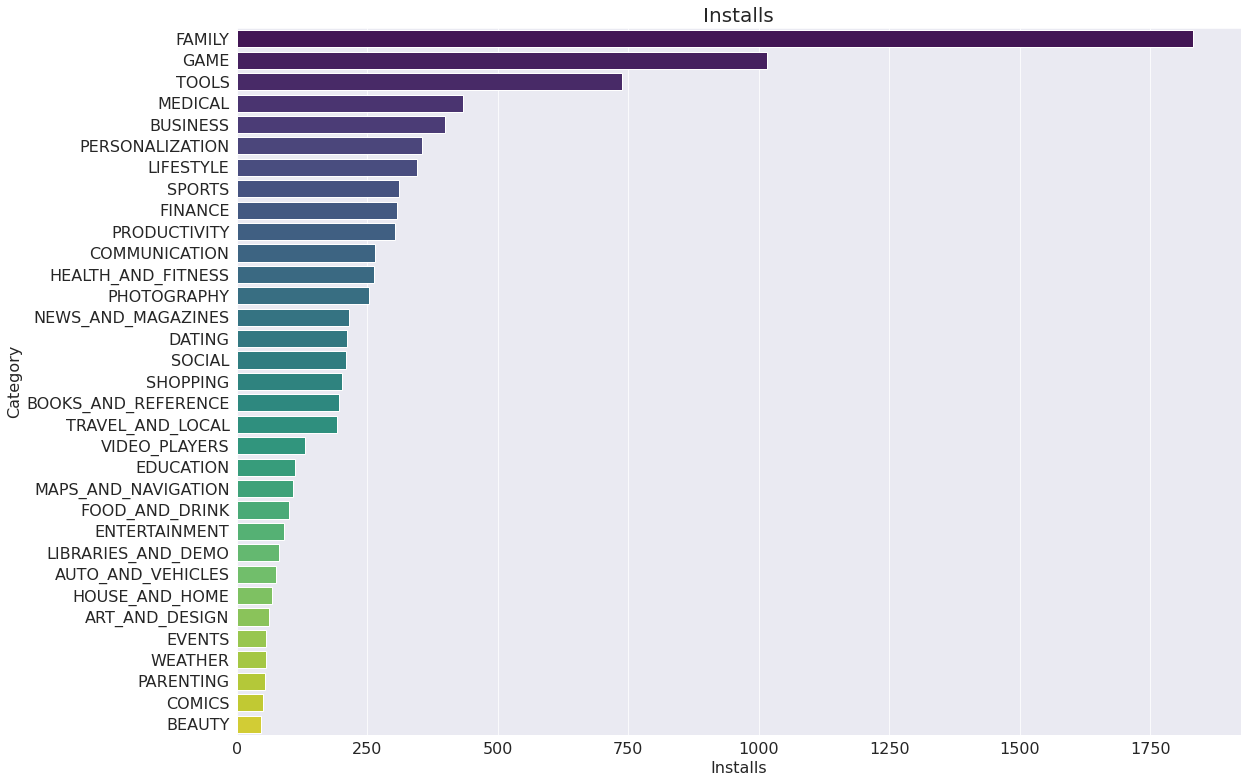

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = xsis, y = ysis, alpha =1, palette= "viridis")
graph.set_title("Installs", fontsize = 20);

In [ ]:
#What are the Top 10 installed apps in any category?
def findtop10incategory(str):
    str = str.upper()
    top10 = PSDA[PSDA['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');



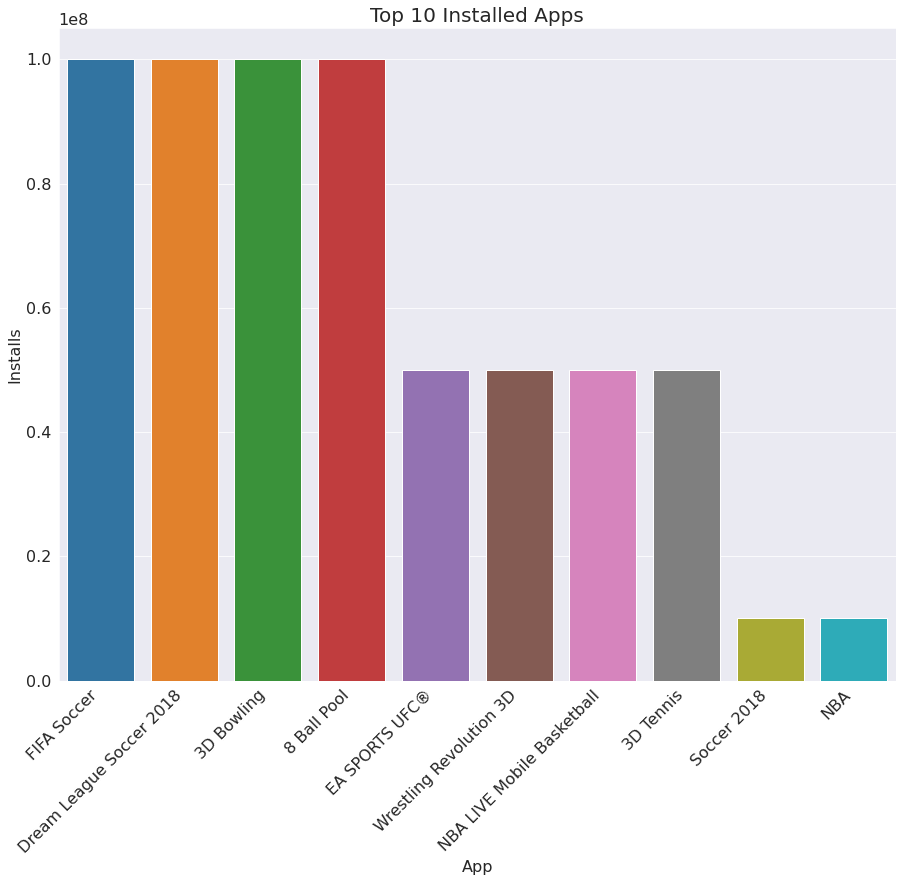

In [ ]:
findtop10incategory('Sports')

In [ ]:
# Which are the Apps with the highest number of reviews?
Apps_with_Highest_rev = PSDA.sort_values(by='Reviews', ascending=False).head(15)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


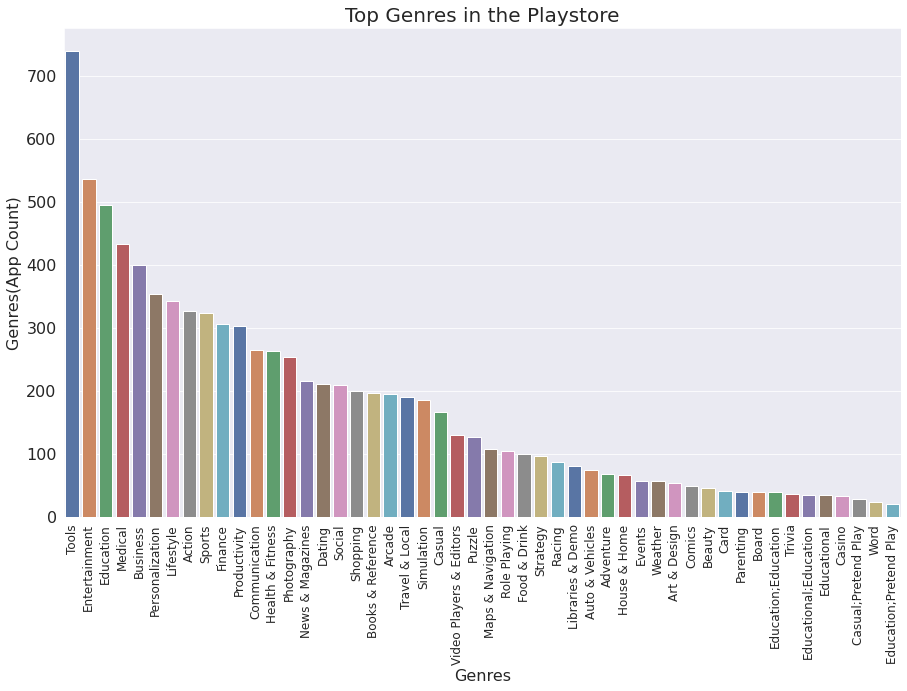

In [ ]:
# What are the count of Apps in different genres?
topAppsinGenres = PSDA['Genres'].value_counts().head(50)
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

# a state to plot and gain an insight into our raised question.

plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

In [ ]:
# Reviews
PSDA.Reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [ ]:
# inside review there is a value with 3.0M with M stand for million, lets change it so it can be measure as float

Reviews = []
converted_num = str(PSDA.Reviews)
for x in converted_num:
    x = x.replace('M','00')
    Reviews.append(x)

Reviews = list(map(str, Reviews))
PSDA['reviews'] = Reviews
sns.distplot(Reviews)

ValueError: ignored

In [ ]:
## Most Reviews Apps on Google Playstore. ->
plt.figure(figsize=(12,12))
sum_rew = PSDA.groupby(['Category'])['reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=PSDA)

KeyError: ignored

<Figure size 864x864 with 0 Axes>

In [ ]:
# Android Version
PSDA['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.0 and up', '2.3.3 and up',
       'Varies with device', '3.2 and up', '4.4W and up', '7.1 and up',
       '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0', '3.1 and up',
       '2.0.1 and up', '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [ ]:
## Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.
PSDA['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
PSDA['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
PSDA['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
PSDA['Android Ver'].fillna('1.0', inplace=True)

Category           Android Ver
ART_AND_DESIGN     4.0            51
                   2.0             8
                   3.0             2
                   5.0             1
AUTO_AND_VEHICLES  4.0            58
                                  ..
WEATHER            4.0            36
                   2.0            10
                   5.0             7
                   1.0             3
                   3.0             1
Name: Android Ver, Length: 190, dtype: int64


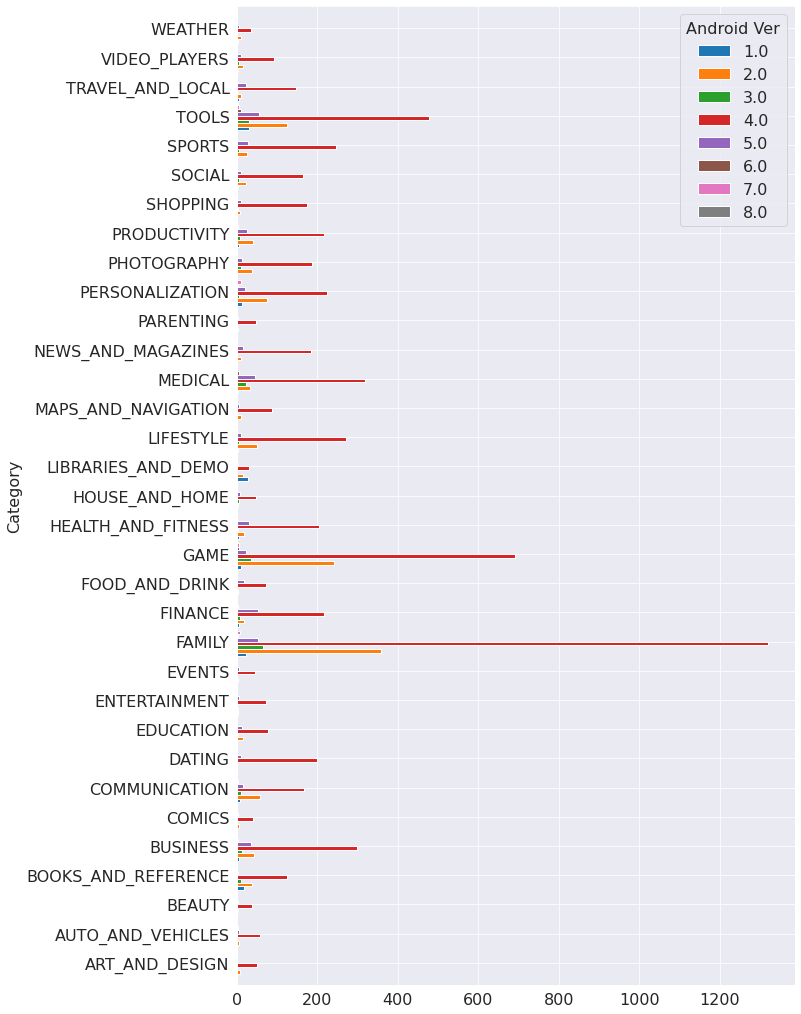

In [ ]:
print(PSDA.groupby('Category')['Android Ver'].value_counts())
Type_cat = PSDA.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()